# An attempt to determine the evolution of bias lines in the SM CCDS

In [139]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [140]:
from extraction_sm import *
from astropy.io import fits

In [160]:
# pick out all files for one fov and row

fov = 1
row = 5
pathfile = "split_filenames/filenames_sm_{}_row_{}.txt".format(fov,row)


allfiles = []
f = open(pathfile, 'r')
allfiles = f.readlines()
f.close()

# strip away newlines and add absolute path prefix
allfiles = ["../../"+s.strip() for s in allfiles]

sourcefiles = allfiles[:]

print("Using", len(sourcefiles), "files")

Using 1184 files


In [161]:
# get the bias
(image,gain,bias,readnoise,fov,row,tstart,tstop) = sm_get_image(sourcefiles[0], "../../datasets/sm_bias/sm_calibdat.fits")

In [162]:
# let's test the execution time
import time
timingstart = time.time()


# for each file: read the image, get the minimum over AL and save it.
# minimum should be fine here

#nfiles = len(sourcefiles)

nfiles = len(sourcefiles)
lines = np.zeros((nfiles,983))

for ii in range(nfiles):
    values = np.ma.masked_equal(fits.getdata(sourcefiles[ii])[:,7:],0,copy=False) - bias
    lines[ii] = np.min(values,axis=0)
    
timingend = time.time()
print("Elapsed time:", timingend - timingstart)

Elapsed time: 273.01182675361633


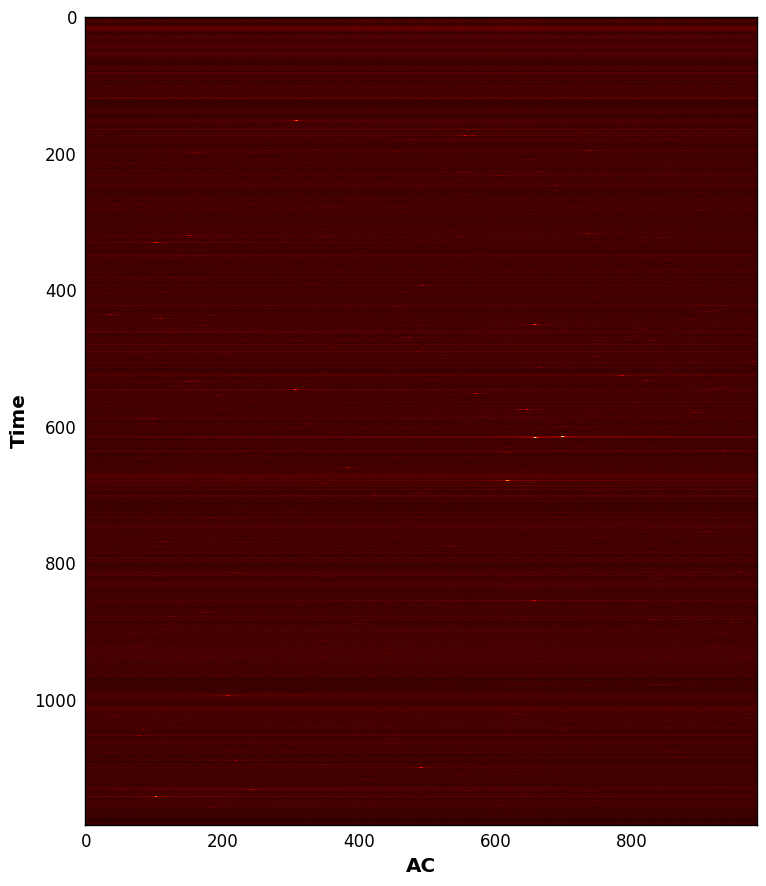

In [163]:
image = lines

plt.imshow(image,cmap="hot")
plt.ylabel("Time")
plt.xlabel("AC")
plt.gcf().set_size_inches(10.5, 10.5)
plt.grid(False)
#plt.colorbar(orientation='horizontal')

Identified (index including prescan)

FOV 1:
- Row 1: None
- Row 2: None
- Row 3: None
- Row 4: 75
- Row 5: None
- Row 6: None?
- Row 7: None?

FOV 2:
- Row 1: None?
- Row 2: None?
- Row 3: None?
- Row 4: None?
- Row 5: None?
- Row 6: None?
- Row 7: None?

In [66]:
np.where(lines==np.max(lines))

(array([138]), array([541]))

In [67]:
sourcefiles[138]

'../../datasets/sif_fits/2017-08-11/SIF_PROCESSING_CCD_ROW_7_SM2_OBMT_START_119434652000474300_CDP_NONE.fits'